In [203]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, make_scorer

We are now going to take on the Titanic dataset, and predict wheter a given passanger will survive or not - given a few features.

Make sure to read about the dataset [here.](https://www.kaggle.com/c/titanic/data)

In [204]:
# load the titanic dataset

titanic_df = pd.read_csv('../data/titanic.csv')

titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [205]:
fare = titanic_df.loc[titanic_df.Fare > 50.000]["Survived"]
rate_fare = sum(fare)/len(fare)

print("% of people that payed over 50.000 in fare who survived:", rate_fare)

% of people that payed over 50.000 in fare who survived: 0.68125


In [206]:
men = titanic_df.loc[titanic_df.Sex == "male"]["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

women = titanic_df.loc[titanic_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of men who survived: 0.18890814558058924
% of women who survived: 0.7420382165605095


In [207]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [208]:
print(titanic_df.groupby("Pclass")["Survived"].sum())
print(titanic_df.groupby("Sex")["Survived"].sum())
print(titanic_df.groupby("Age")["Survived"].sum())
print(titanic_df.groupby("Parch")["Survived"].sum())
print(titanic_df.groupby("Embarked")["Survived"].sum())
print(titanic_df.groupby("Cabin")["Survived"].sum())
print(titanic_df.groupby("Fare")["Survived"].sum())
print(titanic_df.groupby("SibSp")["Survived"].sum())


Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64
Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    0
70.50    0
71.00    0
74.00    0
80.00    1
Name: Survived, Length: 88, dtype: int64
Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64
Embarked
C     93
Q     30
S    217
Name: Survived, dtype: int64
Cabin
A10    0
A14    0
A16    1
A19    0
A20    1
      ..
F33    3
F38    0
F4     2
G6     2
T      0
Name: Survived, Length: 147, dtype: int64
Fare
0.0000      1
4.0125      0
5.0000      0
6.2375      0
6.4375      0
           ..
227.5250    3
247.5208    1
262.3750    2
263.0000    2
512.3292    3
Name: Survived, Length: 248, dtype: int64
SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64


---

## Challenges

**Task 1**

Read the documentation of the dataset, and think carefully about the features available. Which ones do you think are relevant to predict wether someone survives or not?

Now drop the columns you think are redundant.

In [209]:
titan_keep_df = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).reset_index(drop=True)

**Task 2**

Do some preliminary EDA, and clean columns in a suitable way if warranted. Remember to also conduct (if needed) feature engineering, one-hot-encoding (categorical columns) etc.

In general, prepare your data for training.

*Note*: You do NOT need to do any feature scaling for logistic regression.

In [210]:
titan_keep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [211]:
titan_keep_df = pd.get_dummies(titan_keep_df, columns=["Sex", "Embarked"], dtype=int, drop_first=True)

titan_keep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_male    891 non-null    int64  
 7   Embarked_Q  891 non-null    int64  
 8   Embarked_S  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


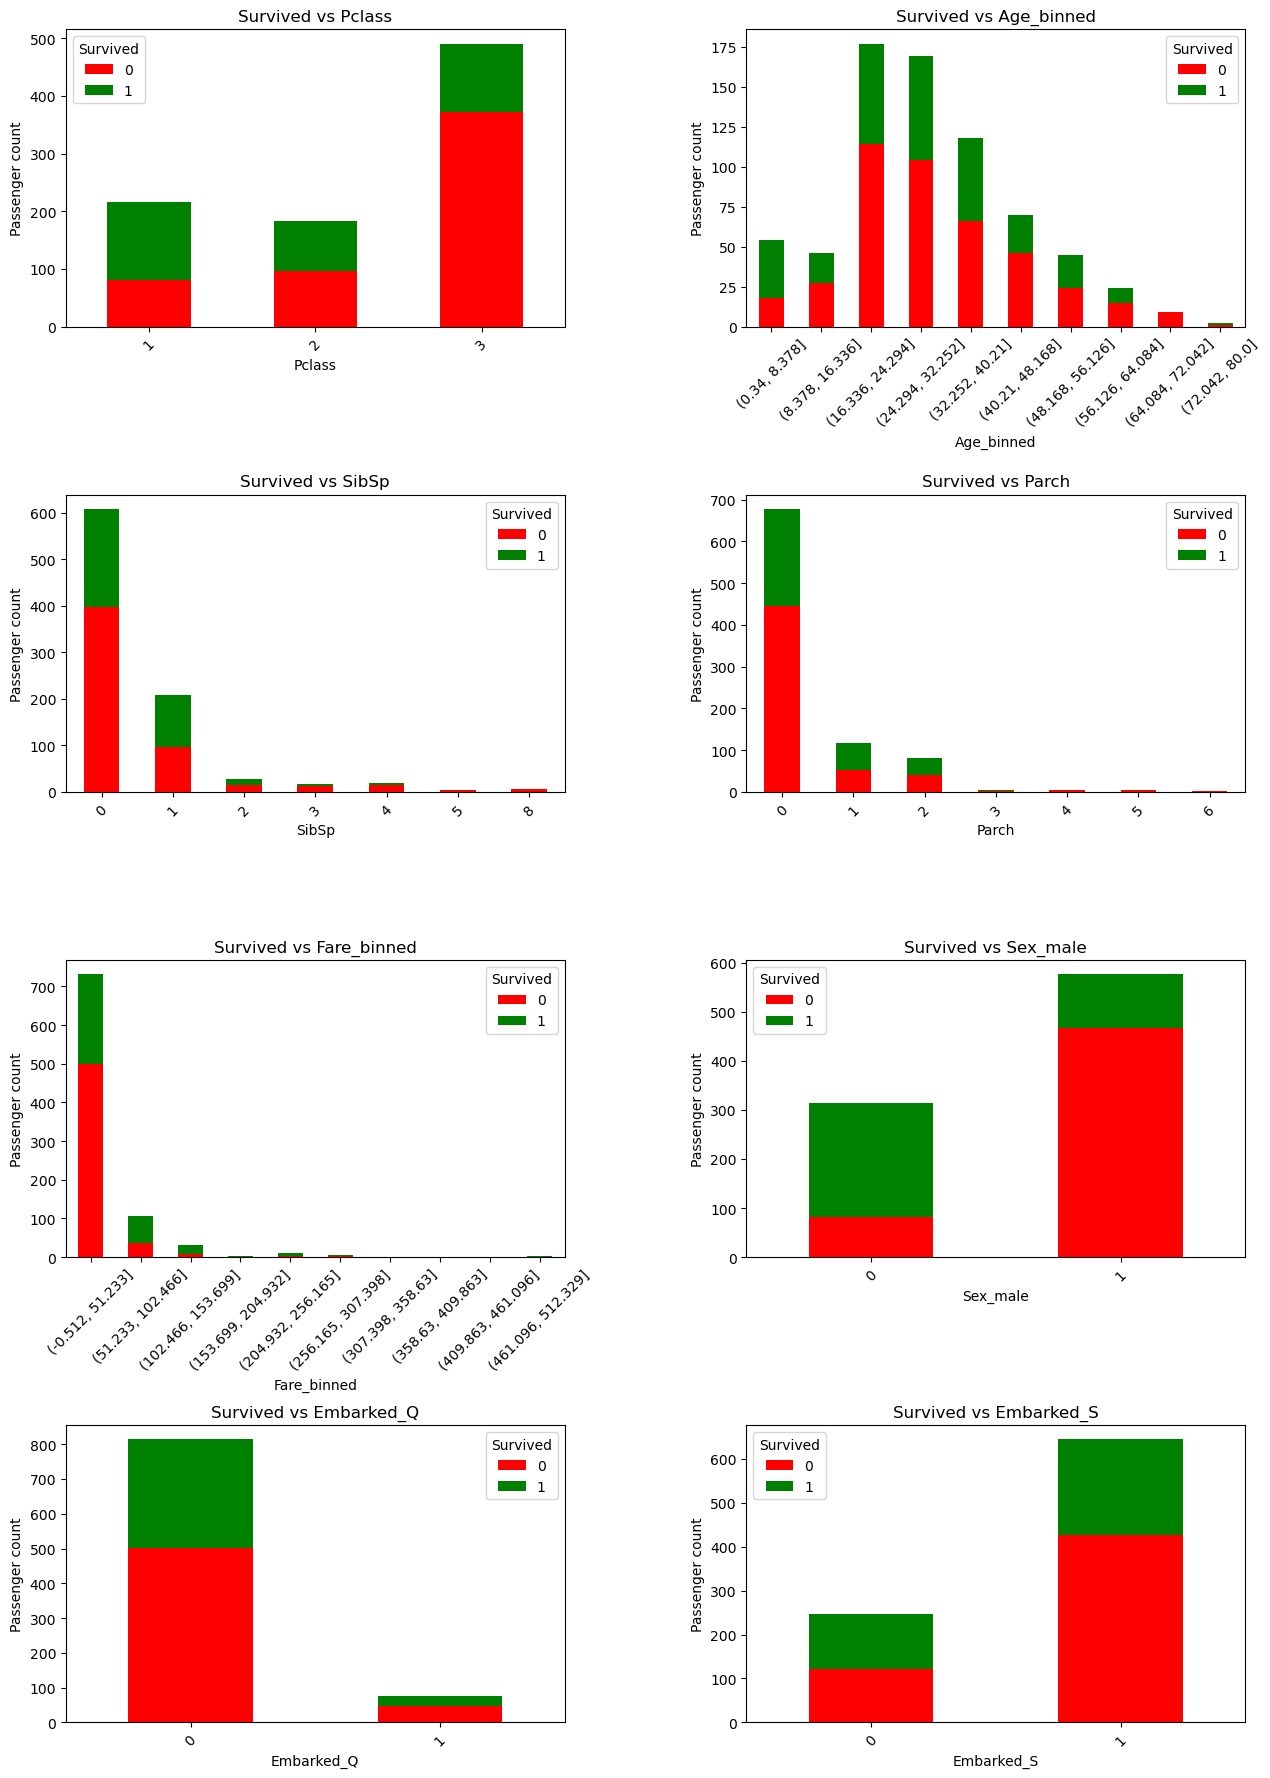

In [212]:

columns_to_plot = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]

titan_keep_df["Age_binned"] = pd.cut(titan_keep_df["Age"], bins=10)
titan_keep_df["Fare_binned"] = pd.cut(titan_keep_df["Fare"], bins=10)

columns_to_plot = ["Pclass", "Age_binned", "SibSp", "Parch", "Fare_binned", "Sex_male", "Embarked_Q", "Embarked_S"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
fig.tight_layout(pad=10.0)

for i, column in enumerate(columns_to_plot):
    row = i // 2  
    col = i % 2   
    
    titan_keep_df.groupby([column, "Survived"], observed=False).size().unstack().plot(
        kind="bar", stacked=True, color=["red", "green"], ax=axes[row, col]
    )
    
    axes[row, col].set_title(f"Survived vs {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Passenger count")
    axes[row, col].tick_params(axis='x', rotation=45)  

for i in range(len(columns_to_plot), 4 * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()




In [213]:
titan_keep_df.isnull().sum()

Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
Sex_male         0
Embarked_Q       0
Embarked_S       0
Age_binned     177
Fare_binned      0
dtype: int64

In [214]:
titan_keep_df["Survived"].sum()

np.int64(342)

In [215]:
titan_keep_df["Age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

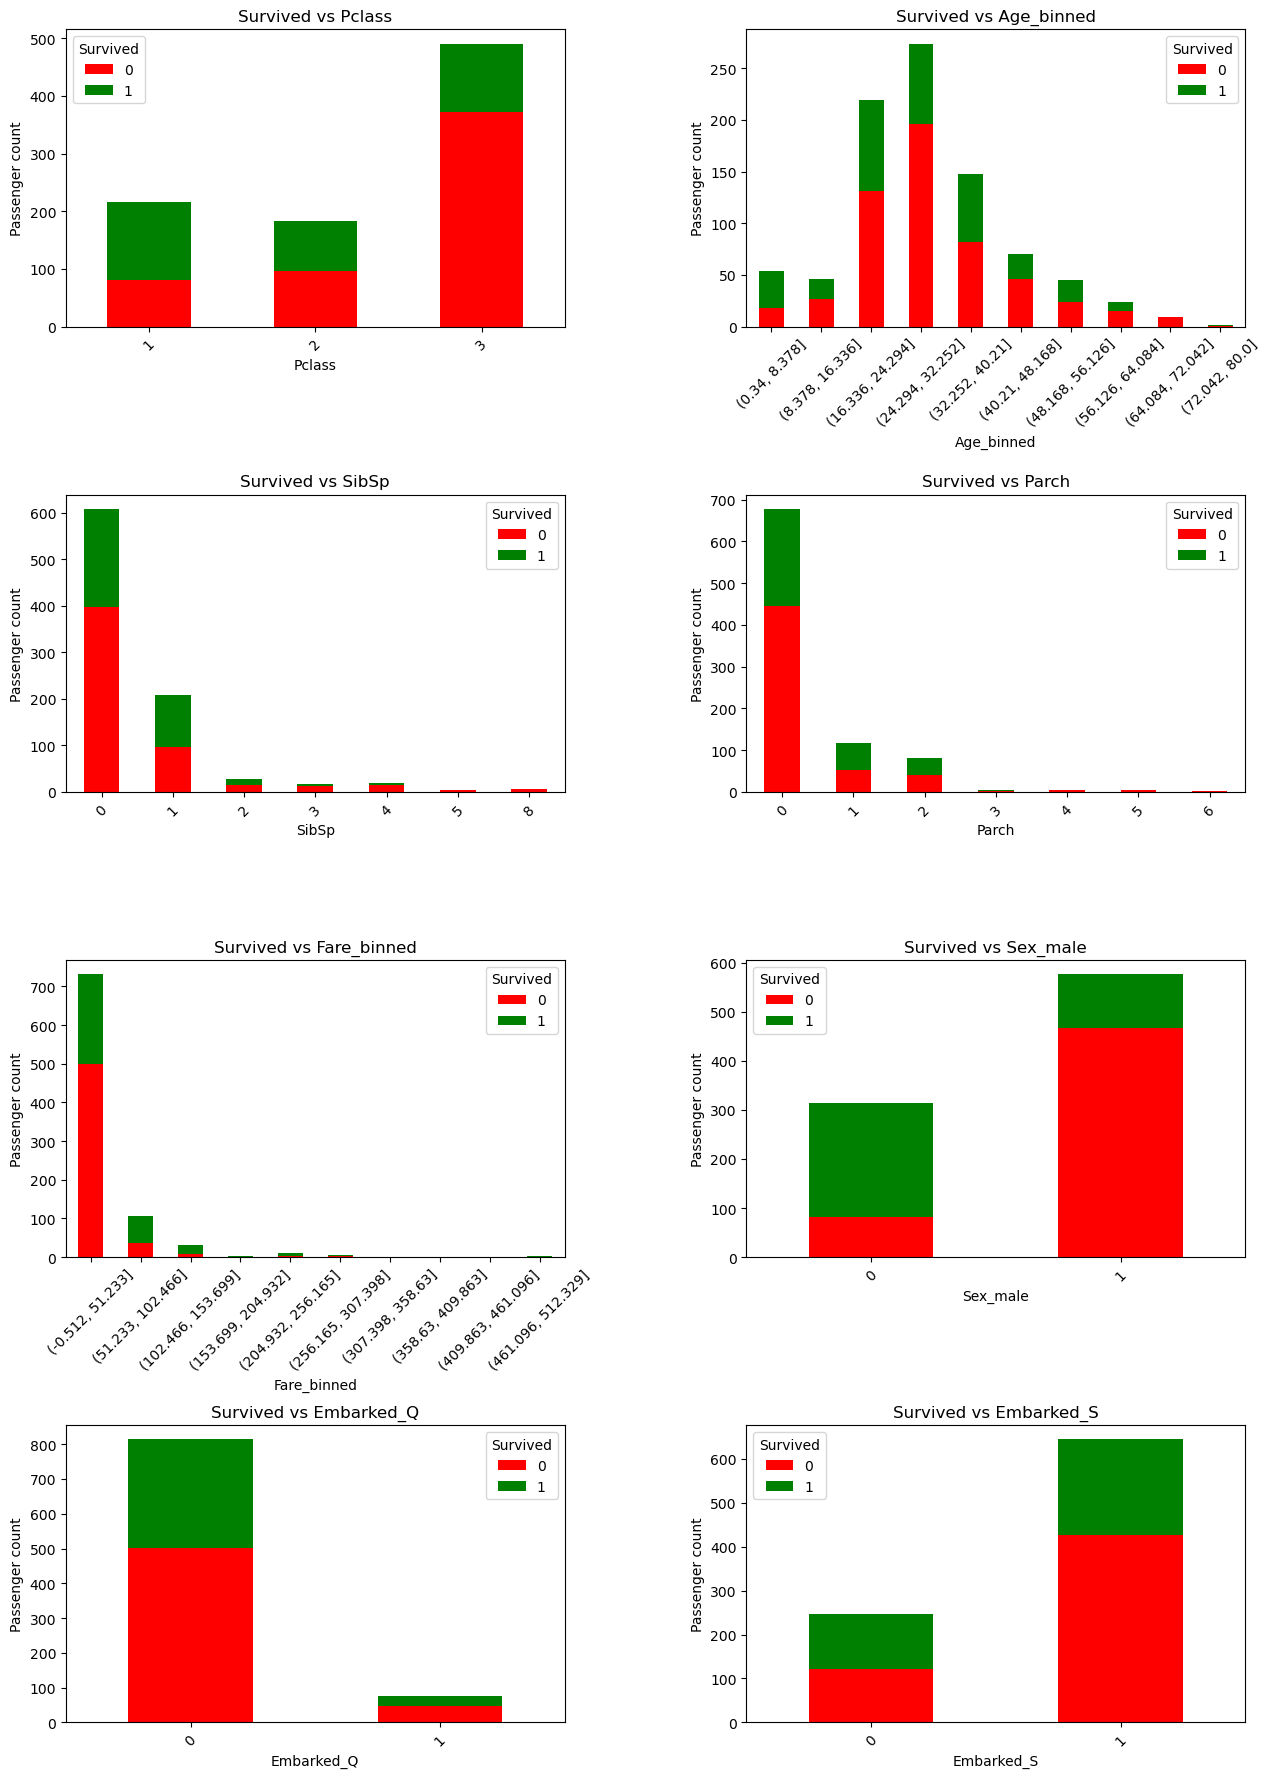

In [216]:
titan_keep_df["Age"] = titan_keep_df.groupby(["Pclass", "Sex_male"])["Age"].transform(lambda x: x.fillna(x.median()))

columns_to_plot = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]

titan_keep_df["Age_binned"] = pd.cut(titan_keep_df["Age"], bins=10)
titan_keep_df["Fare_binned"] = pd.cut(titan_keep_df["Fare"], bins=10)

columns_to_plot = ["Pclass", "Age_binned", "SibSp", "Parch", "Fare_binned", "Sex_male", "Embarked_Q", "Embarked_S"]

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))  
fig.tight_layout(pad=10.0)

for i, column in enumerate(columns_to_plot):
    row = i // 2  
    col = i % 2   
    
    titan_keep_df.groupby([column, "Survived"], observed=False).size().unstack().plot(
        kind="bar", stacked=True, color=["red", "green"], ax=axes[row, col]
    )
    
    axes[row, col].set_title(f"Survived vs {column}")
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Passenger count")
    axes[row, col].tick_params(axis='x', rotation=45)  

for i in range(len(columns_to_plot), 4 * 2):
    fig.delaxes(axes.flatten()[i])

plt.show()


In [217]:
titan_keep_df.isnull().sum()

Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Age_binned     0
Fare_binned    0
dtype: int64

**Task 3**

Train a logistic regression model to predict wether someone survives, or not. 

Use 5-fold cross-validation to assess performance.

Use accuracy, precision and recall score.

In [218]:
titan_keep_df = titan_keep_df.drop(columns=["Age_binned", "Fare_binned"])


In [219]:
X, y = titan_keep_df.drop(columns=["Survived"]), titan_keep_df["Survived"]

model = LogisticRegression(max_iter=1000, random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score)
}

scores = {metric: cross_val_score(model, X, y, cv=cv, scoring=scoring[metric]) for metric in scoring}

print("Accuracy:", np.mean(scores['accuracy']))
print("Precision:", np.mean(scores['precision']))
print("Recall:", np.mean(scores['recall']))


Accuracy: 0.80023225158496
Precision: 0.7569999189182683
Recall: 0.707459505541347


**Task 4**

Now do a normal train/test split and train a logistic model on this.

Plot a confusion matrix on the predictions of your test set. Is your model performing okay-ish?

In [220]:
X, y = titan_keep_df.drop(columns=["Survived"]), titan_keep_df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(712, 8)
(712,)
(179, 8)
(179,)


In [221]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_train_hats = logistic_model.predict(x_train)
y_test_hats = logistic_model.predict(x_test)

print('Train accuracy:')
print(accuracy_score(y_train, y_train_hats))
print('Test accuracy:')
print(accuracy_score(y_test, y_test_hats))

Train accuracy:
0.8202247191011236
Test accuracy:
0.770949720670391


/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


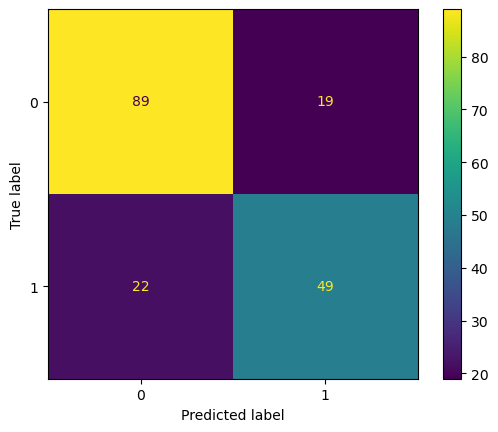

In [222]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_hats)
cm = confusion_matrix(y_true=y_test, y_pred=y_test_hats)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show() 


In [223]:
titan_keep_df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [227]:
X, y = titan_keep_df.drop(columns=["Survived", "Parch", "SibSp", "Fare"]), titan_keep_df["Survived"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)

y_train_hats = logistic_model.predict(x_train)
y_test_hats = logistic_model.predict(x_test)

print('Train accuracy:')
print(accuracy_score(y_train, y_train_hats))
print('Test accuracy:')
print(accuracy_score(y_test, y_test_hats))

Train accuracy:
0.7921348314606742
Test accuracy:
0.7988826815642458


/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


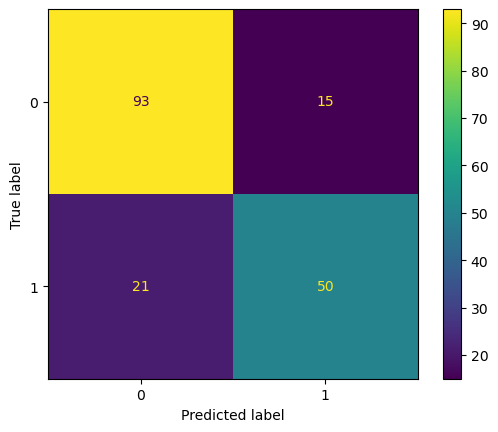

In [228]:
cm = confusion_matrix(y_test, y_test_hats)
cm = confusion_matrix(y_true=y_test, y_pred=y_test_hats)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])

cm_display.plot()
plt.show()